                 date                 user  \
0 2025-05-17 07:25:50  1393937647203143684   
1 2025-05-17 03:15:26            754543548   
2 2025-05-16 17:24:14   765177385545269248   
3 2025-05-16 14:15:53  1563181541529772033   
4 2025-05-16 14:10:30            517594178   

                                                text sentiment  
0  @Ibuka_Rwanda @NgomaDistrict @Unity_MemoryRw @...   Neutral  
1  Rwanda’s fast rate of development and their am...  Positive  
2  RT @_Yanoh: The way Kagame talks you wouldn't ...  Negative  
3  RT @_Yanoh: The way Kagame talks you wouldn't ...  Negative  
4  RT @_Yanoh: The way Kagame talks you wouldn't ...  Negative  


<Figure size 1000x600 with 0 Axes>

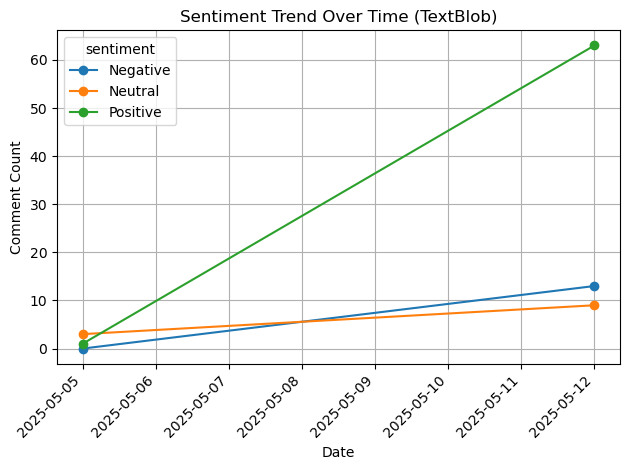

In [17]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("../data/expanded_tweets.csv")

# Apply sentiment analysis using TextBlob
def classify_sentiment_blob(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity >= 0.05:
        return "Positive"
    elif polarity <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["text"].apply(classify_sentiment_blob)

# Parse date and remove timezone info
df["date"] = pd.to_datetime(df["date"]).dt.tz_localize(None)

# Group by week and sentiment
sentiment_over_time = df.groupby([df["date"].dt.to_period("W"), "sentiment"]).size().unstack(fill_value=0)
sentiment_over_time.index = sentiment_over_time.index.to_timestamp()

# OPTIONAL: Preview the processed data
print(df.head())

# Plot sentiment trend
plt.figure(figsize=(10, 6))
sentiment_over_time.plot(marker='o')
plt.title("Sentiment Trend Over Time (TextBlob)")
plt.xlabel("Date")
plt.ylabel("Comment Count")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
# ====================================
# FareReformInsights – Sentiment Analysis Script
# ====================================

import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# ------------------------------------
# 1. Load Dataset
# ------------------------------------
df = pd.read_csv("../data/expanded_tweets.csv")
df["date"] = pd.to_datetime(df["date"]).dt.tz_localize(None)



# ------------------------------------
# 2. Sentiment Analysis using TextBlob
# ------------------------------------
def classify_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity >= 0.05:
        return "Positive"
    elif polarity <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["text"].apply(classify_sentiment)


# ------------------------------------
# 3. Subjectivity Score & Flagging
# ------------------------------------
df["subjectivity"] = df["text"].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df["flagged"] = df["subjectivity"] > 0.85  # High subjectivity = potentially misleading


<Figure size 1000x600 with 0 Axes>

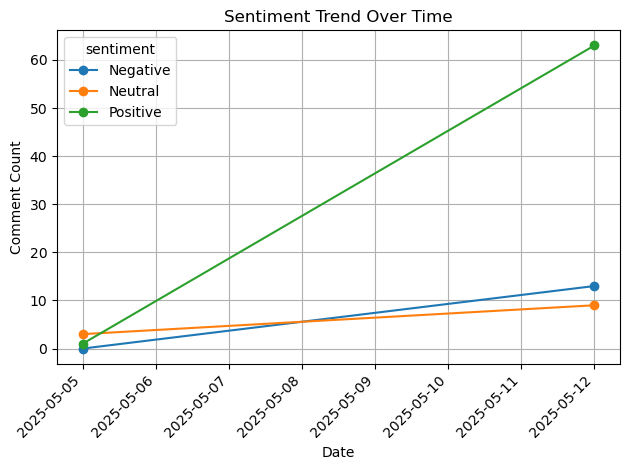

In [23]:
# ------------------------------------
# 4. Sentiment Trend Over Time
# ------------------------------------
sentiment_over_time = df.groupby([df["date"].dt.to_period("W"), "sentiment"]).size().unstack(fill_value=0)
sentiment_over_time.index = sentiment_over_time.index.to_timestamp()

plt.figure(figsize=(10, 6))
sentiment_over_time.plot(marker='o')
plt.title("Sentiment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Comment Count")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

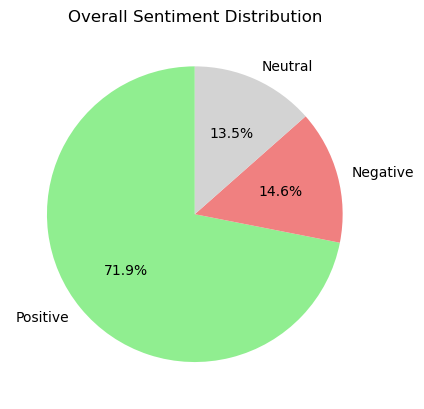

In [24]:

# ------------------------------------
# 5. Sentiment Distribution Pie Chart
# ------------------------------------
df["sentiment"].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'lightcoral', 'lightgrey']
)
plt.title("Overall Sentiment Distribution")
plt.ylabel('')
plt.show()


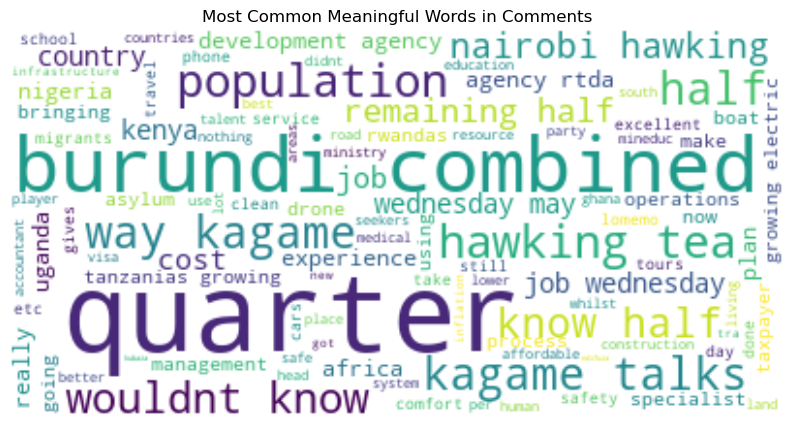

In [31]:
import re
from wordcloud import STOPWORDS

# Custom stop words
custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    "RT", "https", "t", "co", "rwanda", "Rwanda", "transport", "public", "fare", "city", "kigali", "kololo", "whole", "potholes", "consider", "preeminent", "diplomatic"
])

# Clean text: remove links, mentions, non-alphabetic chars
def clean_text(text):
    text = re.sub(r"http\S+", "", text)            # remove URLs
    text = re.sub(r"@\w+", "", text)               # remove @mentions
    text = re.sub(r"[^a-zA-Z\s]", "", text)        # remove punctuation/numbers
    text = text.lower()                            # lowercase
    return text

# Join and clean all comments
text = ' '.join(df["text"].dropna().apply(clean_text).tolist())

# Generate the word cloud
wordcloud = WordCloud(stopwords=custom_stopwords, background_color='white', max_words=100).generate(text)

# Plot it
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Meaningful Words in Comments")
plt.show()


In [26]:

# ------------------------------------
# 7. Sample Comments & Flags
# ------------------------------------
print("\n🔹 Top 3 Positive Comments:")
print(df[df["sentiment"] == "Positive"]["text"].head(3).to_string(index=False))

print("\n🔸 Top 3 Negative Comments:")
print(df[df["sentiment"] == "Negative"]["text"].head(3).to_string(index=False))

print("\n⚠️ Flagged Comments with High Subjectivity:")
print(df[df["flagged"]][["date", "text"]].to_string(index=False))



🔹 Top 3 Positive Comments:
Rwanda’s fast rate of development and their amb...
RT @Lomemotours2025: 🚐✨ LOMEMO Tours and Transp...
🚐✨ LOMEMO Tours and Transport gives you very cl...

🔸 Top 3 Negative Comments:
RT @_Yanoh: The way Kagame talks you wouldn't k...
RT @_Yanoh: The way Kagame talks you wouldn't k...
RT @_Yanoh: The way Kagame talks you wouldn't k...

⚠️ Flagged Comments with High Subjectivity:
               date                                                                                                                                                                                                                                                                                           text
2025-05-16 08:38:14                                                                                                                                                   RT @Lomemotours2025: 🚐✨ LOMEMO Tours and Transport gives you very clean cars and excellent service. Travel Rwanda in com